## Defining the Question

#### Background Information

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

#### Problem Statement

The purpose of this project is to predict the price of a house that a realtor can charge, or
a customer can invest to buy a house by considering multiple input factors. Perform
multiple linear regression checking for assumptions.

#### Dataset

The dataset contains house sale prices for King County, which includes Seattle. It
includes homes sold between May 2014 and May 2015. The dataset is unbalanced with
a wide range of houses information that is built and renovated from the year 1990 to 2015. The dataset has a total of 21 variables including price, price, condition, number of
bedrooms, bathrooms and other features of the house.

Dataset URL = https://bit.ly/2Ww3f6sPropertiesDs

Project URL = https://bit.ly/3h9W2AJ


#### Metric of success

A model that predicts the price of a house

#### Solution steps

1. Import libraries
2. Data exploration: load data, preview and explore data, check for and handle missing values and duplicates, fix inconsistent column names if any
2. Data preparation: prepare data for use in model training
3. Data modeling: create, train and evaluate the model
4. Summarise findings and provide recommendations

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
import warnings
import matplotlib.pyplot as plt 
from matplotlib.cbook import boxplot_stats
import seaborn as sns
warnings.filterwarnings('ignore')

## Data Exploration

In [3]:
# load dataset
df = pd.read_csv('https://bit.ly/2Ww3f6sPropertiesDs')

In [4]:
# view a sample of 10 records
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16695,4223000280,20141029T000000,221000.0,4,1.75,1540,7200,1.0,0,0,...,7,1260,280,1966,0,98003,47.3424,-122.308,1540,8416
70,1525059190,20140912T000000,1040000.0,5,3.25,4770,50094,1.0,0,0,...,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917
12410,191100810,20140811T000000,870000.0,5,2.25,2910,9525,2.0,0,0,...,9,2910,0,1968,0,98040,47.5633,-122.218,2740,9525
17829,2767600150,20140519T000000,477000.0,3,2.50,1350,2053,3.0,0,0,...,8,1350,0,2005,0,98117,47.6758,-122.386,1350,4150
8331,3601800580,20141021T000000,250000.0,4,2.00,2600,9000,1.0,0,0,...,8,1410,1190,1959,0,98032,47.3810,-122.299,2600,7200
7235,6127010670,20140728T000000,627000.0,5,3.25,3570,5425,2.0,0,0,...,7,3570,0,2005,0,98075,47.5933,-122.007,2690,5347
4340,5101404563,20140627T000000,561500.0,3,1.75,1960,6380,1.0,0,0,...,7,980,980,1939,0,98115,47.6975,-122.316,1480,6380
7143,1099600010,20140612T000000,210000.0,4,1.50,1130,7840,1.0,0,0,...,7,1130,0,1970,0,98023,47.2986,-122.377,1690,7840
4937,1250203070,20140514T000000,1400000.0,3,2.50,2550,7200,2.0,0,2,...,10,2550,0,1981,2013,98144,47.5996,-122.288,2030,3500
3633,425079100,20141231T000000,406500.0,3,2.75,1840,68479,1.0,0,2,...,8,1340,500,1989,0,98014,47.6802,-121.908,2060,61903


In [5]:
# check column and row sizes
df.shape

(21613, 21)

In [6]:
# check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# check feature datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# check for duplicates
df.duplicated().sum()

0

In [9]:
# drop date and id columns because we don't need them
df = df.drop(['id', 'date'], axis=1)
df.shape

(21613, 19)

## Data Analysis

As part of analysis, we will check the following assumptions of multiple linear regression:

1. There must be a linear relationship between the independent variables and the target variable
2. Little to no multicollinearity
3. Homoscedasticity - variance of error terms must be similar across the independent variables
4. All residuals must be normally distributed
5. Few or no outliers

Helper function

#### Assess linearity: we'll use scatter plot and correlation matrix

In [10]:
# create a list of features that we will compare with price
cols = df.columns.sort_values(ascending=True).to_list()
cols.remove('price')

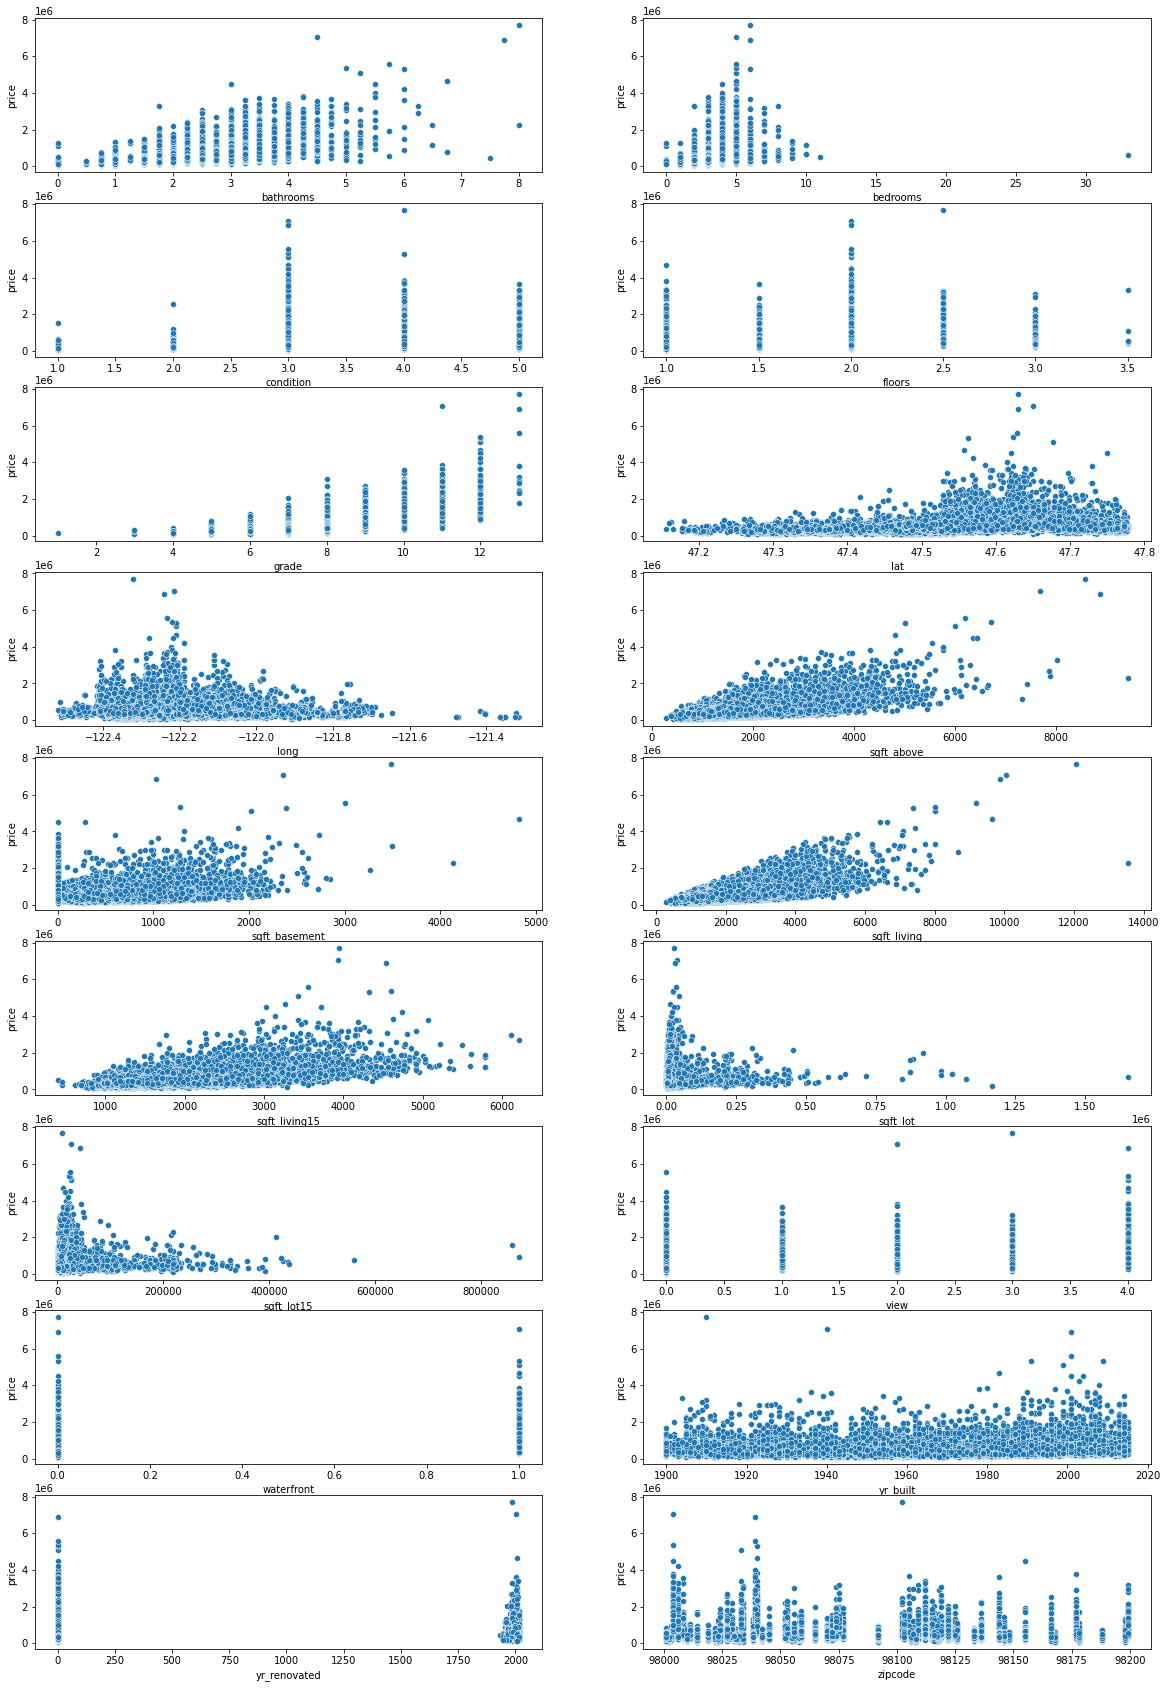

In [11]:
# plot scatter plots
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (20, 30))

for ax, col in zip(axes.flatten(), cols):
    sns.scatterplot(df[col], df['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.show()

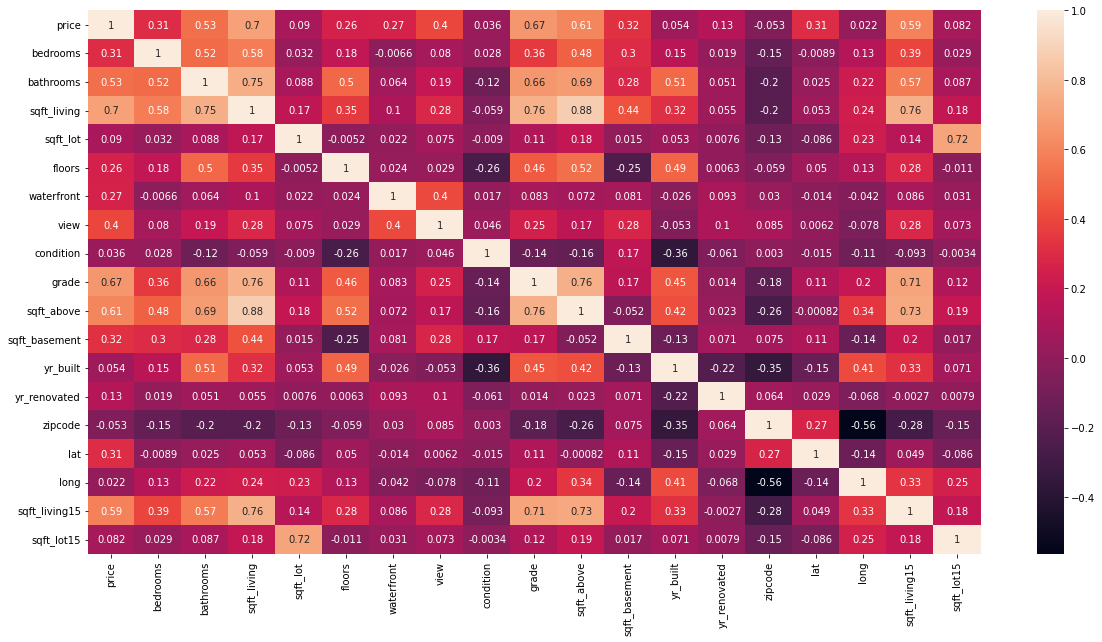

In [12]:
# plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [13]:
df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
Name: price, dtype: float64

**Observation:**
waterfront, floors, yr_renovated, sqft_lot, sqft_lot15, yr_built, zipcode, condition, long features aren't strongly corelated to price. We can drop them.

In [14]:
corr = df.corr()['price'].abs().sort_values(ascending=False)
cols_to_drop = corr[corr < 0.3].index

In [15]:
df = df.drop(cols_to_drop, axis=1)

In [16]:
df.shape

(21613, 10)

#### Assess multicolinearity: we'll use variance inflation factor (VIF)

In [17]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print()
    print(' *******************************************')
       
    # Gathering the VIF for each variable
    print('\n** VIF for each variable **')
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
    
    print(' \n*******************************************')

    # Gathering and printing total cases of possible or definite multicollinearity
    print('\n** Gathering and printing total cases of possible or definite multicollinearity **')
    
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    print(' *******************************************')

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print('Coefficient interpretability may be problematic')
    else:
        print('Assumption not satisfied')
        print('Coefficient interpretability will be problematic')

In [18]:
logistic_regression = LinearRegression()
multicollinearity_assumption(logistic_regression, df.drop(['price'], axis=1).values, df['price'], df.drop(['price'], axis=1).columns)

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables

 *******************************************

** VIF for each variable **
bedrooms: 22.7629666262636
bathrooms: 21.6978579175326
sqft_living: inf
view: 1.2783918602547848
grade: 133.04754912330407
sqft_above: inf
sqft_basement: inf
lat: 81.6937834201554
sqft_living15: 25.551340477531962
 
*******************************************

** Gathering and printing total cases of possible or definite multicollinearity **
8 cases of possible multicollinearity
4 cases of definite multicollinearity

 *******************************************
Assumption not satisfied
Coefficient interpretability will be problematic


**Observation:** there's multicolinearity among the variables

#### Assessing residual distribution

#### Assessing  homoscedasticity: we'll plot the residuals

In [26]:
def calculate_residuals(model, features, target):
    # train model
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 0)
    model.fit(features_train, target_train)
    
    # predict and calculate residuals
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': target, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [27]:
def homoscedasticity_assumption(model, features, target):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, target)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

In [23]:
housing_model = LinearRegression()

In [29]:
X = df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]].values
Y = df.iloc[:, 0].values

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


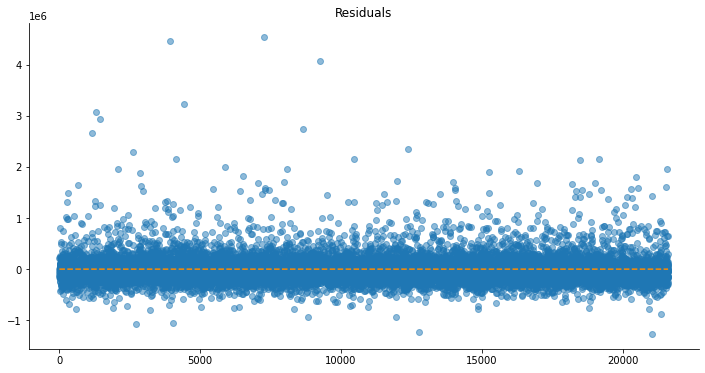

In [30]:
homoscedasticity_assumption(housing_model, X, Y)

**Observation:** Variance across our residuals isn't fully uniform, this is potentially problematic.

#### Checking outliers: we'll use boxplot

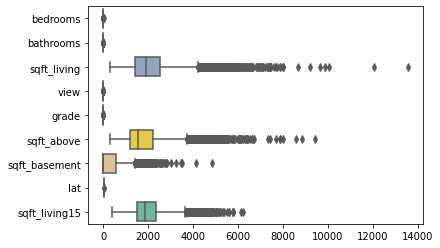

In [31]:
ax = sns.boxplot(data=df.drop('price', axis=1), orient="h", palette="Set2")

**Observation:** Our data has outliers, thus our model estimates will be biased.

## Data Preparation

Set target and features

In [32]:
features = df.drop(['price'], axis=1)
target = df['price']

Split data into training and testing sets

In [33]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

## Data Modeling

In [44]:
# the model
logistic_regression = LinearRegression()

# train the model
logistic_regression.fit(features_train,target_train)

# print test score
train_score = logistic_regression.score(features_train, target_train)
print('Score: {}'.format(train_score))

Score: 0.6391048858619839


In [45]:
# predict
predictions = logistic_regression.predict(features_test)

In [46]:
print('RMSE:', np.sqrt(mean_squared_error(target_test, predictions)))
print('R Squared:', r2_score(target_test, predictions))
test_score = logistic_regression.score(features_test, target_test)
print('Score: {}'.format(test_score))

RMSE: 206199.80318953807
R Squared: 0.6424753409302435
Score: 0.6424753409302435


## Summary of Findings and Recommendations

Our data didn't meet linearity, multicollinearity, and outliers assumptions. Therefore, our model predictions were possibly biased. Furthermore, the model didn't meet the accuracy threshold.

I would recommend use of other regression algorithms.

## Challenging Your Solution

1. Did we have the right question? Yes

2. Did we have the right data? Yes

3. What can be done to improve the solution?
* Hyperparameter tuning
* Try other regression algorithms
* Boosting